In [275]:
# Import some packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [276]:
#import sys
# !{sys.executable} -m pip install pmdarima

In [277]:
df = pd.read_csv('VIXX.csv')
df = pd.DataFrame(df)

In [278]:
df.shape

(1258, 7)

In [279]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-05,12.08,12.26,11.18,11.39,11.39,0
1,2016-08-08,11.66,11.78,11.41,11.50,11.50,0
2,2016-08-09,11.40,11.92,11.02,11.66,11.66,0
3,2016-08-10,11.55,12.50,11.37,12.05,12.05,0
4,2016-08-11,11.93,12.11,11.38,11.68,11.68,0


In [280]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-07-29,17.910000,18.010000,17.190001,17.700001,17.700001,0
1254,2021-07-30,19.690001,19.719999,17.530001,18.240000,18.240000,0
1255,2021-08-02,18.160000,19.870001,17.990000,19.459999,19.459999,0
1256,2021-08-03,19.170000,20.440001,17.700001,18.040001,18.040001,0
1257,2021-08-04,18.230000,18.900000,17.670000,17.969999,17.969999,0


In [281]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [282]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.0
mean,18.117289,19.291391,17.027615,17.992003,17.992003,0.0
std,8.920257,9.836861,7.963582,8.839441,8.839441,0.0
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0
25%,12.470000,12.975000,11.905000,12.342500,12.342500,0.0
50%,15.530000,16.369999,14.695000,15.455000,15.455000,0.0
75%,21.542499,22.694999,19.965000,21.222500,21.222500,0.0
max,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


In [283]:
df['Date'] = pd.to_datetime(df['Date'])
print (df['Date'].dtype)

datetime64[ns]


In [284]:
df = df.set_index('Date')

In [285]:
print(df[df['Close'] == df['Close'].max()])
print(df[df['Close'] == df['Close'].min()])

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-03-16  57.830002  83.559998  57.830002  82.690002  82.690002       0
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2017-11-03  9.83  9.91  8.99   9.14       9.14       0


<AxesSubplot:xlabel='Date', ylabel='Close'>

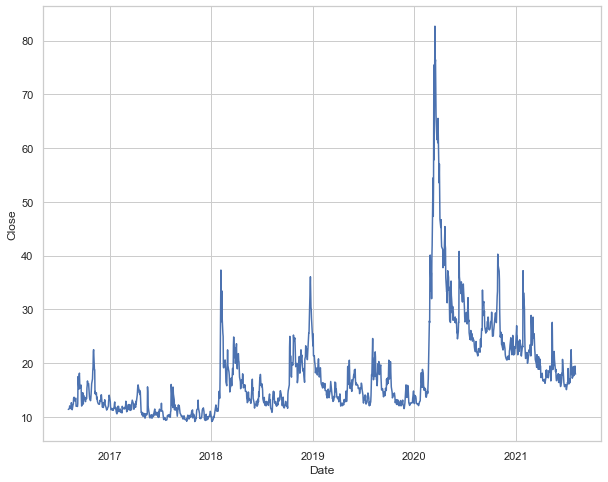

In [286]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=df['Close'])

<AxesSubplot:xlabel='Date'>

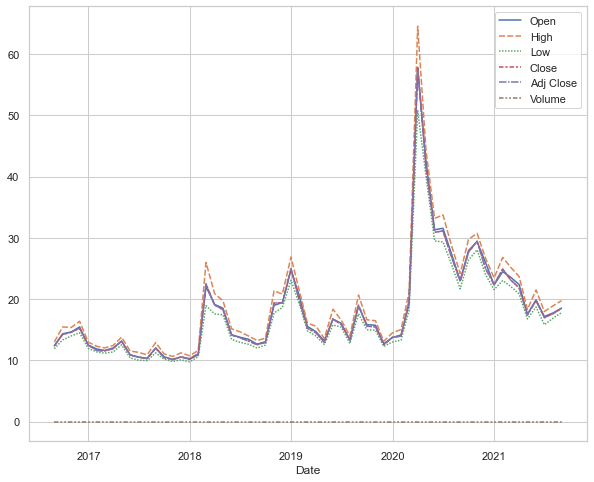

In [287]:
# Apply the Moving Average function by a subset of 4 querters (yearly data)
df_mean = df.resample('M').mean()
df_mean
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_mean)


Pandemic 

In [288]:
pand = df[df.index.year >= 2020]
pand

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0
2020-01-08,15.160000,15.240000,12.830000,13.450000,13.450000,0
...,...,...,...,...,...,...
2021-07-29,17.910000,18.010000,17.190001,17.700001,17.700001,0
2021-07-30,19.690001,19.719999,17.530001,18.240000,18.240000,0
2021-08-02,18.160000,19.870001,17.990000,19.459999,19.459999,0


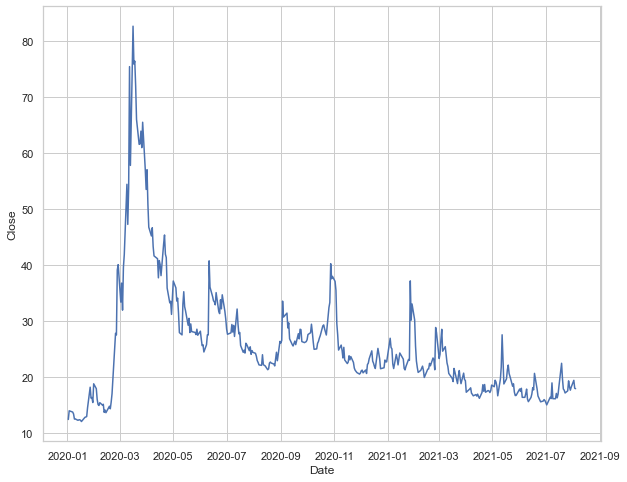

In [289]:

sns.set_theme(style="whitegrid")
sns.lineplot(data=pand['Close'])
sns.set(rc={'figure.figsize':(10,8)})

In [290]:
# Removing pandemic and post-pandemic observations 
dat = df['Close'][df.index <= '2020-02-01']
B = pd.DataFrame(dat)

In [291]:
B.describe()

,Close
count,878.000000
mean,14.295706
std,3.925915
min,9.140000
25%,11.645000
50%,13.170000
75%,15.967500
max,37.320000


<AxesSubplot:ylabel='Count'>

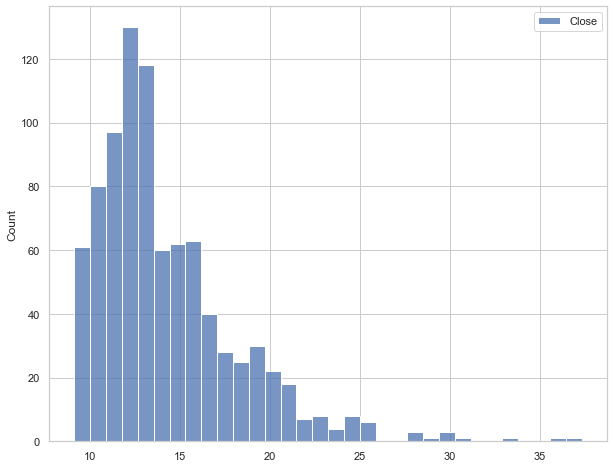

In [292]:
sns.set_theme(style="whitegrid")
sns.histplot(data=B)


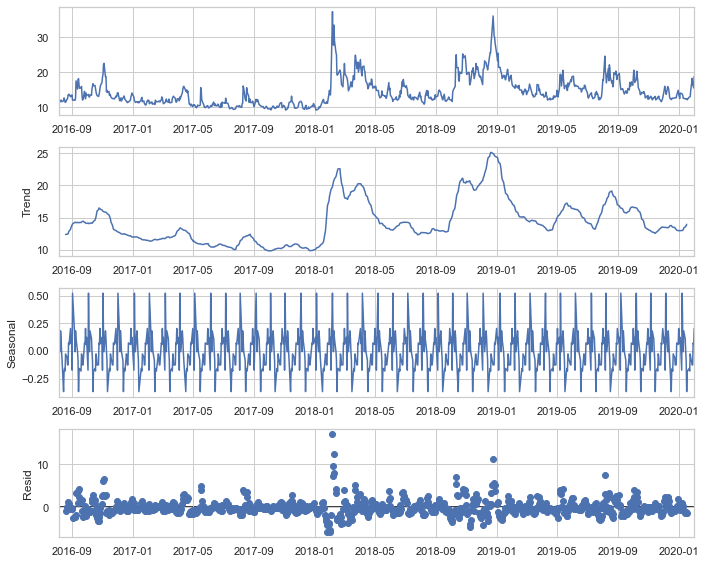

In [293]:
# Multiplicative Decomposition
# Set period=21 because there are 21 trading days in a month
sns.set_theme(style="whitegrid")
from statsmodels.tsa.seasonal import seasonal_decompose
df_decompm = seasonal_decompose(B, model='additive', period=21)


# Plot
df_decompm.plot()
plt.show()


Seasonal zoom-in

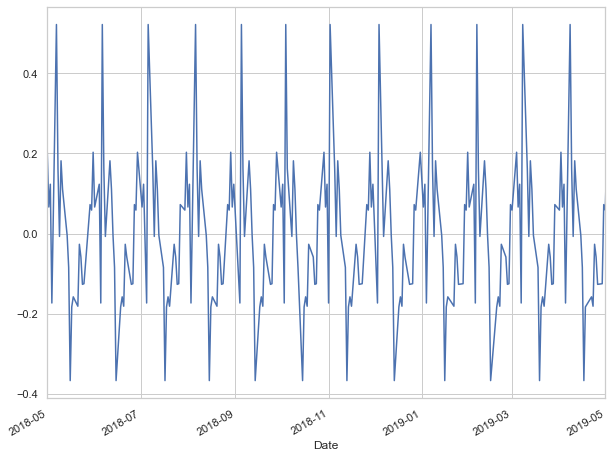

In [294]:
df_decompm.seasonal.plot()
plt.xlim('2018-05','2019-05')
plt.show()

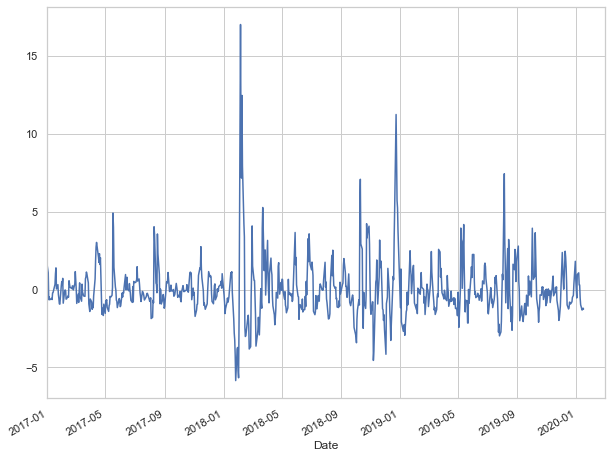

In [295]:
df_decompm.resid.plot()
plt.xlim('2017-01','2020-03')
plt.show()

The VIX is unstable and there is clear seasonality 

In [296]:
print(df_decompm.trend)
print(df_decompm.seasonal)
print(df_decompm.resid)
print(df_decompm.observed)

Date
2016-08-05   NaN
2016-08-08   NaN
2016-08-09   NaN
2016-08-10   NaN
2016-08-11   NaN
              ..
2020-01-27   NaN
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
Name: trend, Length: 878, dtype: float64
Date
2016-08-05    0.162414
2016-08-08   -0.007319
2016-08-09    0.181740
2016-08-10    0.110404
2016-08-11   -0.004752
                ...   
2020-01-27   -0.127110
2020-01-28   -0.125473
2020-01-29    0.072263
2020-01-30    0.058511
2020-01-31    0.203111
Name: seasonal, Length: 878, dtype: float64
Date
2016-08-05   NaN
2016-08-08   NaN
2016-08-09   NaN
2016-08-10   NaN
2016-08-11   NaN
              ..
2020-01-27   NaN
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
Name: resid, Length: 878, dtype: float64
Date
2016-08-05    11.390000
2016-08-08    11.500000
2016-08-09    11.660000
2016-08-10    12.050000
2016-08-11    11.680000
                ...    
2020-01-27    18.230000
2020-01-28    16.280001
2020-01-29    16.389999
2020-01-30 

In [297]:
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

result  = ts.adfuller(B, 1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -5.135575
p-value: 0.000012
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [298]:
B.describe()

,Close
count,878.000000
mean,14.295706
std,3.925915
min,9.140000
25%,11.645000
50%,13.170000
75%,15.967500
max,37.320000


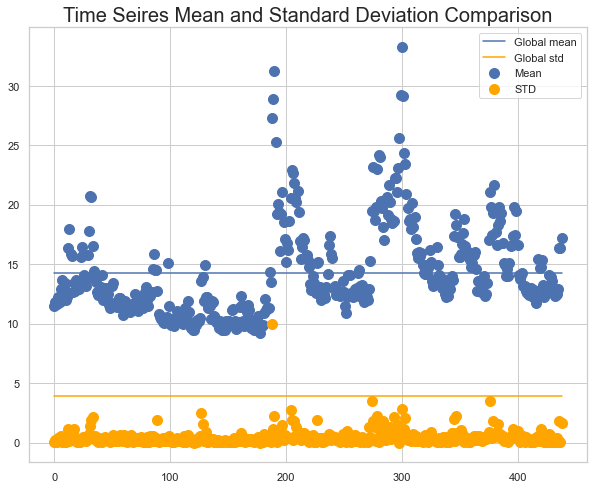

In [299]:
chunks = np.split(B, 439)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
# Plot

plt.title('Time Seires Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [B.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [B.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.figsize=(15, 15)
plt.legend();

In [300]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(B['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3160.266, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3184.591, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3175.880, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3173.876, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3182.619, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3171.263, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3171.827, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3157.207, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3171.211, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3170.948, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3155.252, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3171.910, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3

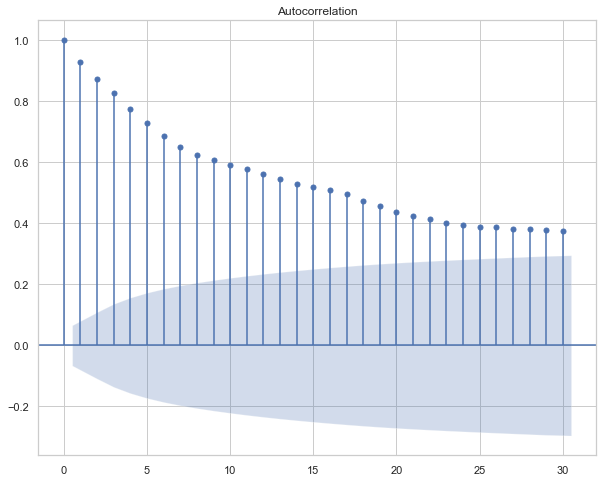

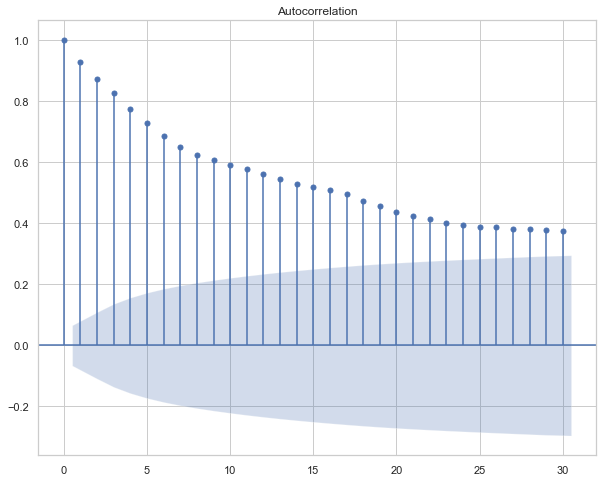

In [301]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(B))


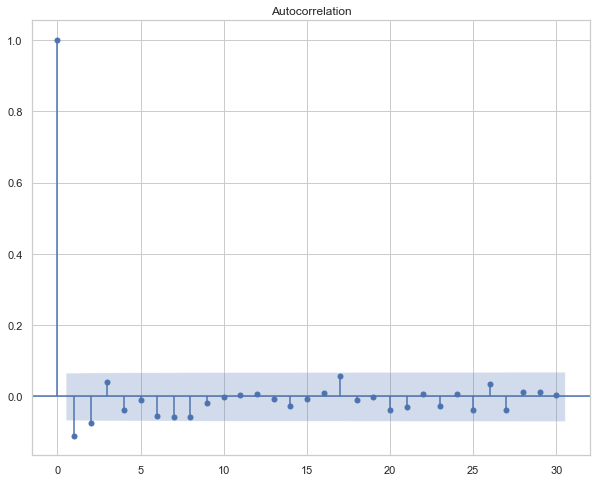

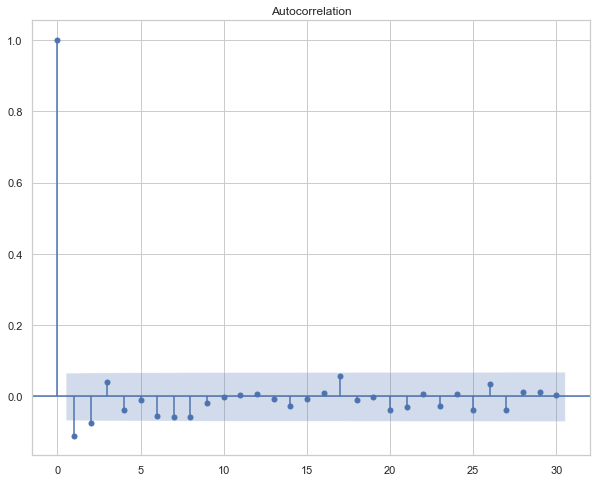

In [302]:
B1 = B.diff()
B1 = B1.dropna()
plot_acf(np.array(B1))

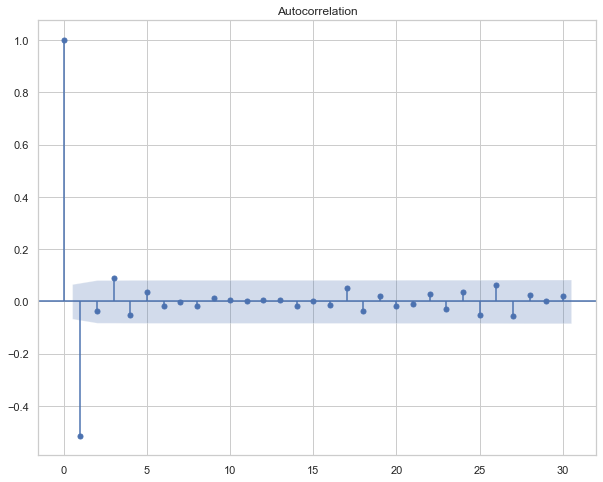

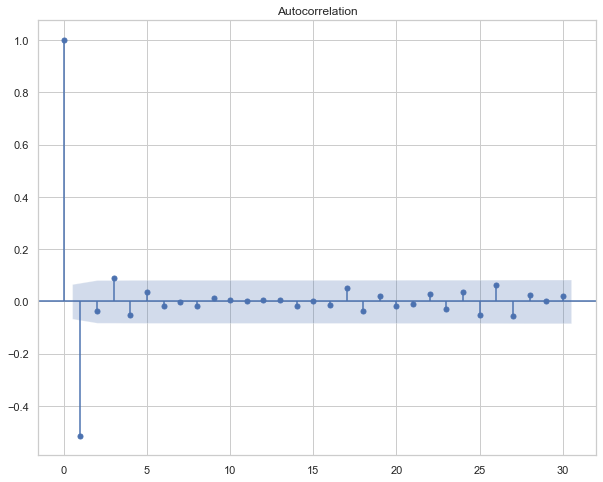

In [303]:

B2 = B.diff().diff()
B2 = B2.dropna()
plot_acf(np.array(B2))

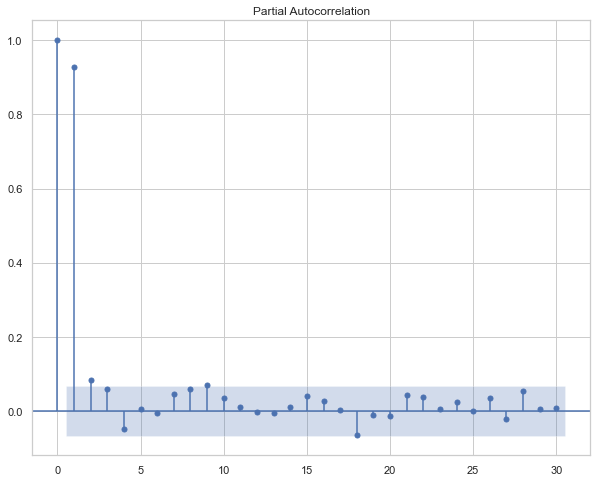

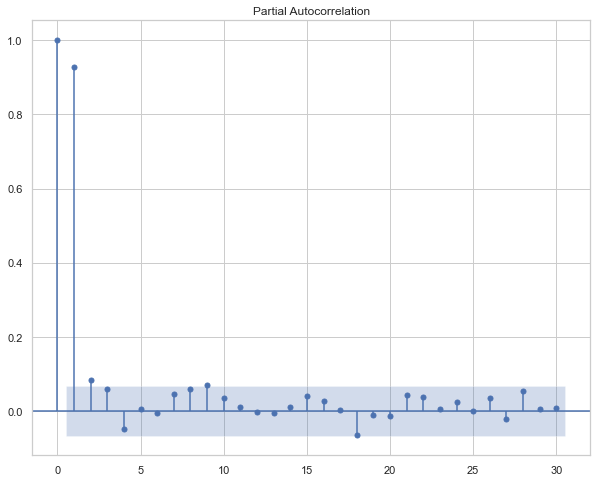

In [304]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(np.array(B))

In [305]:

# X = B.Close
# train_size = int(len(X) * 0.95)
# train, test = X[0:train_size], X[train_size:len(X)]
# print('Observations: %d' % (len(X)))
# print('Training Observations: %d' % (len(train)))
# print('Testing Observations: %d' % (len(test)))


In [306]:
#train = train.to_frame()
#test = test.to_frame()

In [370]:
train=B.iloc[:-30]
test=B.iloc[-30:]

print('Observations: %d' % (len(B.Close)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 878
Training Observations: 848
Testing Observations: 30


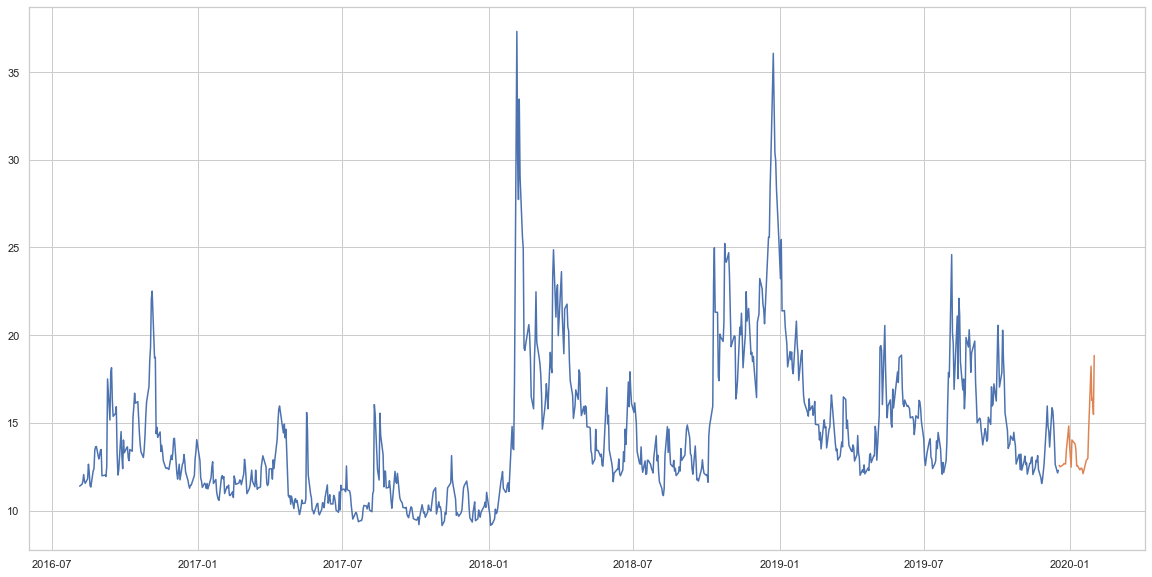

In [371]:
# Visualize train test split
plt.plot(train)
plt.plot(test)

<AxesSubplot:xlabel='Date'>

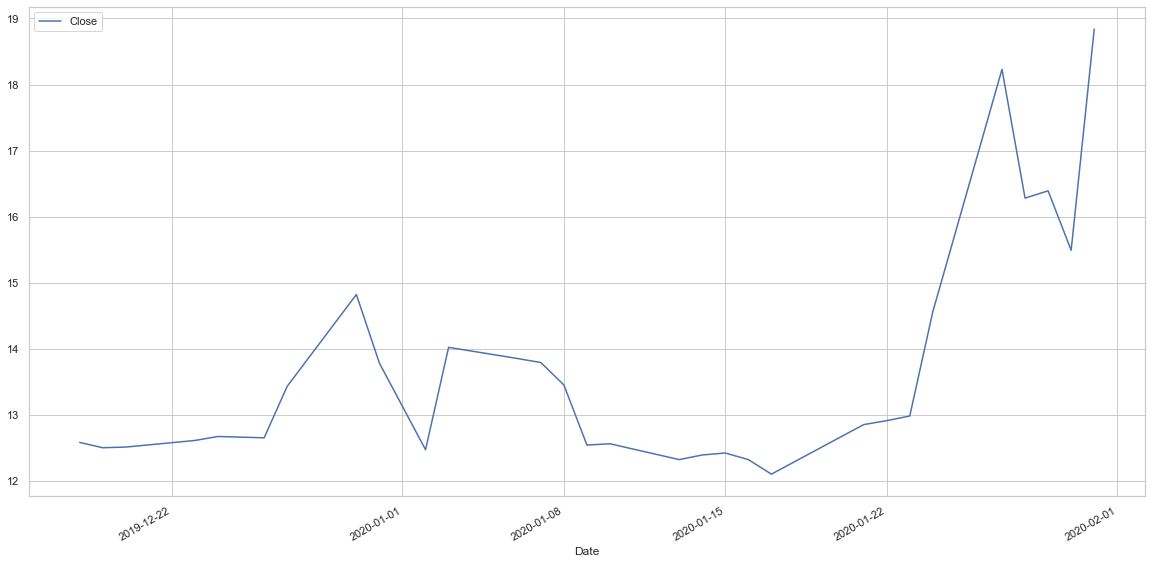

In [372]:
test.plot()

In [373]:
train

,Close
Date,
2016-08-05,11.39
2016-08-08,11.50
2016-08-09,11.66
2016-08-10,12.05
2016-08-11,11.68
...,...
2019-12-11,14.99
2019-12-12,13.94
2019-12-13,12.63


In [374]:
test

,Close
Date,
2019-12-18,12.580000
2019-12-19,12.500000
2019-12-20,12.510000
2019-12-23,12.610000
2019-12-24,12.670000
2019-12-26,12.650000
2019-12-27,13.430000
2019-12-30,14.820000
2019-12-31,13.780000


In [375]:
test.loc['2020-01-31']

Close    18.84
Name: 2020-01-31 00:00:00, dtype: float64

In [376]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,1,1))
model=model.fit()
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  848
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1526.148
Date:                Sun, 29 Aug 2021   AIC                           3058.295
Time:                        18:45:10   BIC                           3072.520
Sample:                             0   HQIC                          3063.745
                                - 848                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.027     31.405      0.000       0.795       0.901
ma.L1         -0.9499      0.019    -50.861      0.000      -0.986      -0.913
sigma2         2.1498      0.024     88.654      0.000       2.102       2.197
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):             86752.44
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             4.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [377]:
model.resid

Date
2016-08-05    11.390000
2016-08-08     0.110002
2016-08-09     0.167499
2016-08-10     0.408491
2016-08-11    -0.323250
                ...    
2019-12-11    -0.501833
2019-12-12    -0.941721
2019-12-13    -1.314362
2019-12-16    -0.627902
2019-12-17    -0.031020
Length: 848, dtype: float64

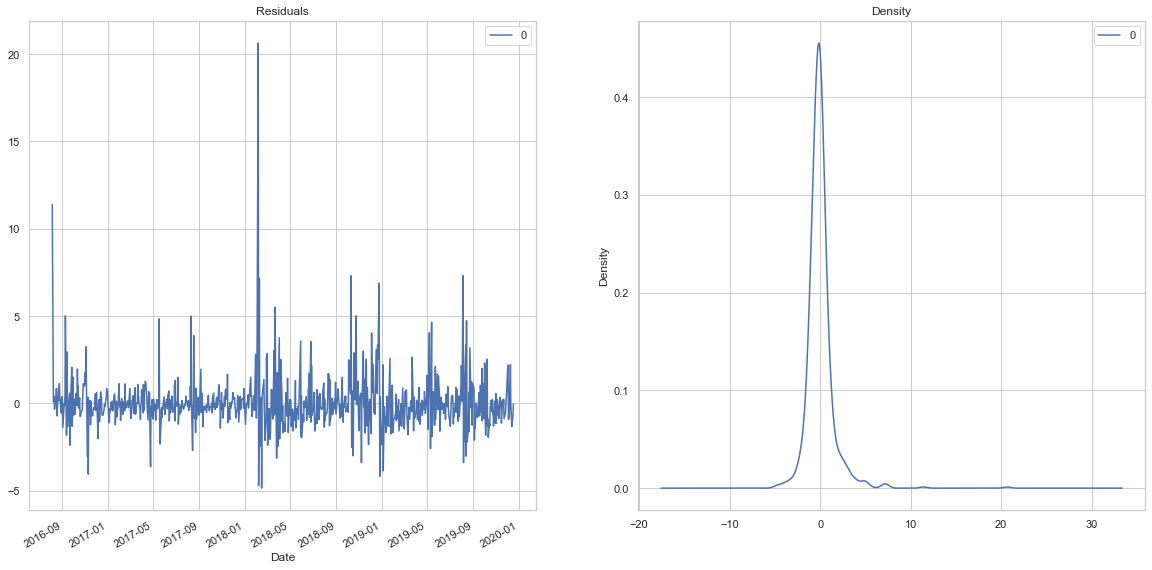

In [378]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [379]:
label='training'

In [391]:
index=pd.bdate_range(start=pd.to_datetime('2019-12-18'),end=pd.to_datetime('01/31/2020'))
index = index[index_future_dates != '2019-12-25' ]
index = index[index1 != '2020-01-01']
index = index[index2 != '2020-01-20']
index

DatetimeIndex(['2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


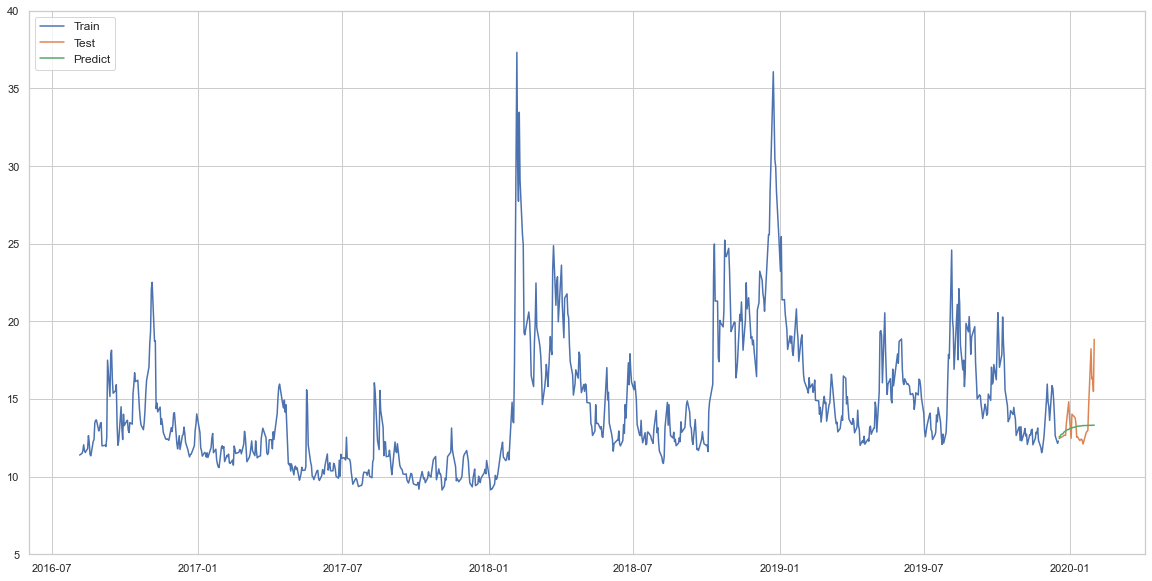

In [381]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index

plt.ylim([5, 40])
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.plot(pred,label='Predict')
plt.legend(loc='upper left', fontsize=12)
plt.show()

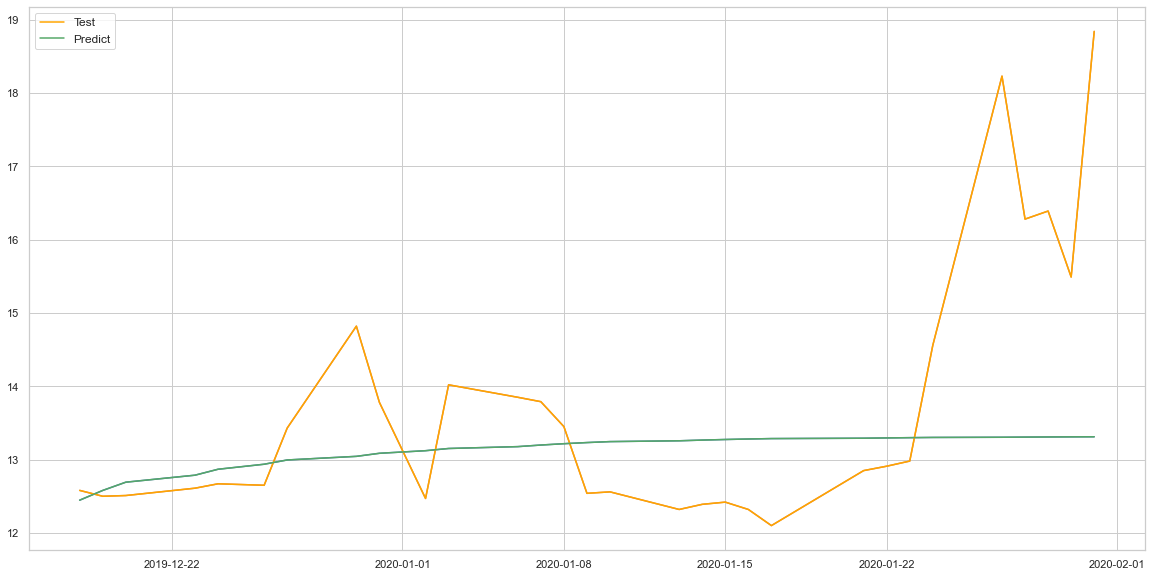

In [382]:
plt.plot (pred)
plt.plot (test)
plt.plot(test, 'orange',label='Test')
plt.plot(pred,label='Predict')


plt.legend(loc='upper left', fontsize=12)
plt.show()

In [386]:
Pred = pred.values
Test = test.values.T
mape = np.mean(np.abs(Pred - Test)/np.abs(Test)) 
mape

In [387]:
Test = test.values.T

In [390]:
mape = np.mean(np.abs(Pred - Test)/np.abs(Test)) 
mape

0.07536801502900345

In [ ]:
# A 7.53% MAPE implies the model is about 92.47% accurate in predicting the next 30 observations.
# MAPE is scale-independent, so they can be used to compare forecasts between different data series

In [353]:
mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) 

2019-12-18 00:00:00   NaN
2019-12-19 00:00:00   NaN
2019-12-20 00:00:00   NaN
2019-12-23 00:00:00   NaN
2019-12-24 00:00:00   NaN
2019-12-26 00:00:00   NaN
2019-12-27 00:00:00   NaN
2019-12-30 00:00:00   NaN
2019-12-31 00:00:00   NaN
2020-01-02 00:00:00   NaN
2020-01-03 00:00:00   NaN
2020-01-06 00:00:00   NaN
2020-01-07 00:00:00   NaN
2020-01-08 00:00:00   NaN
2020-01-09 00:00:00   NaN
2020-01-10 00:00:00   NaN
2020-01-13 00:00:00   NaN
2020-01-14 00:00:00   NaN
2020-01-15 00:00:00   NaN
2020-01-16 00:00:00   NaN
2020-01-17 00:00:00   NaN
2020-01-21 00:00:00   NaN
2020-01-22 00:00:00   NaN
2020-01-23 00:00:00   NaN
2020-01-24 00:00:00   NaN
2020-01-27 00:00:00   NaN
2020-01-28 00:00:00   NaN
2020-01-29 00:00:00   NaN
2020-01-30 00:00:00   NaN
2020-01-31 00:00:00   NaN
Close                 NaN
dtype: float64

Since our time series is non-stationary, we have to decompose the time series. 
To do that, two approaches are listed below

This is the decomposed time series using automatic decomposition 

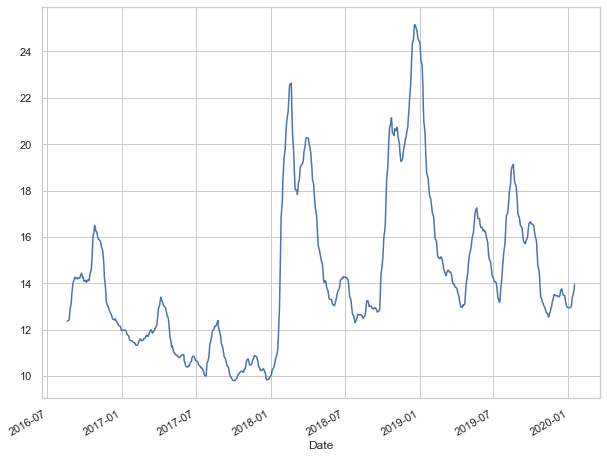

In [27]:
# This is decomposed time series by automatic decomposition
decomp = df_decompm.trend
decomp.plot()
plt.show()

In [28]:
DE = pd.DataFrame(decomp)
DE

,trend
Date,
2016-08-05,NaN
2016-08-08,NaN
2016-08-09,NaN
2016-08-10,NaN
2016-08-11,NaN
...,...
2020-01-27,NaN
2020-01-28,NaN
2020-01-29,NaN


In [29]:
DE_new = DE.dropna()

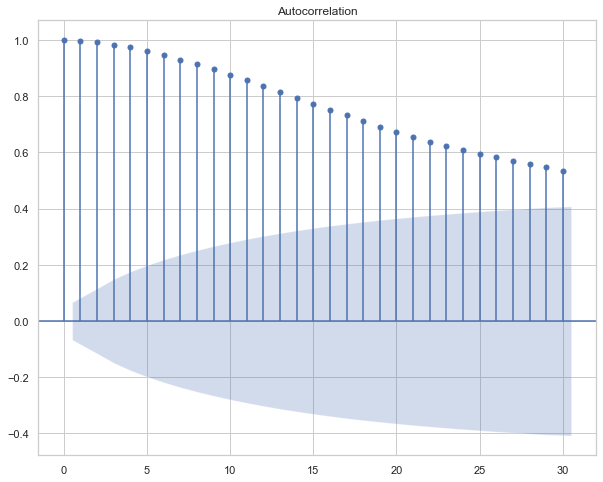

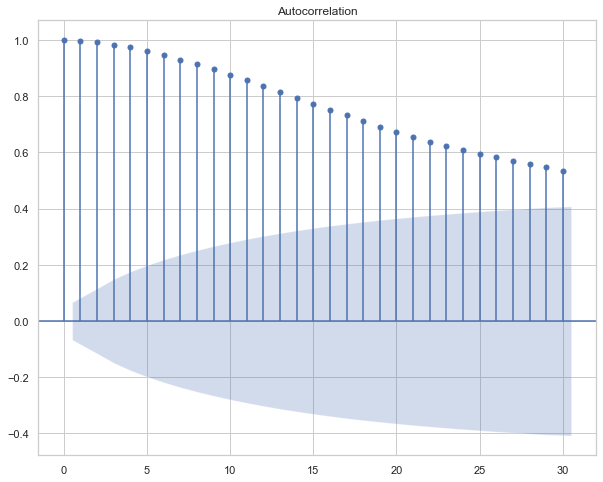

In [30]:
plot_acf(np.array(DE_new))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


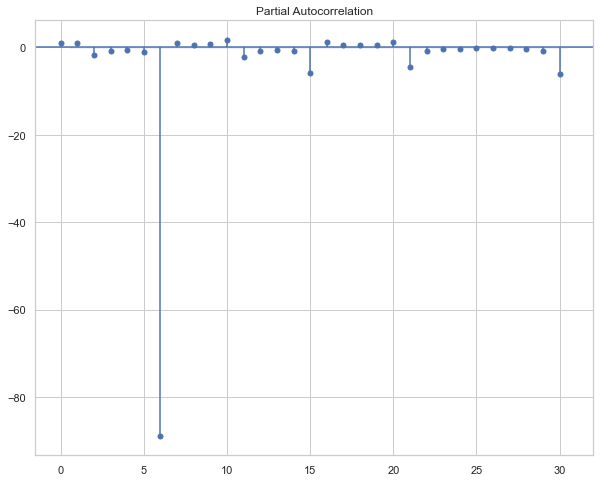

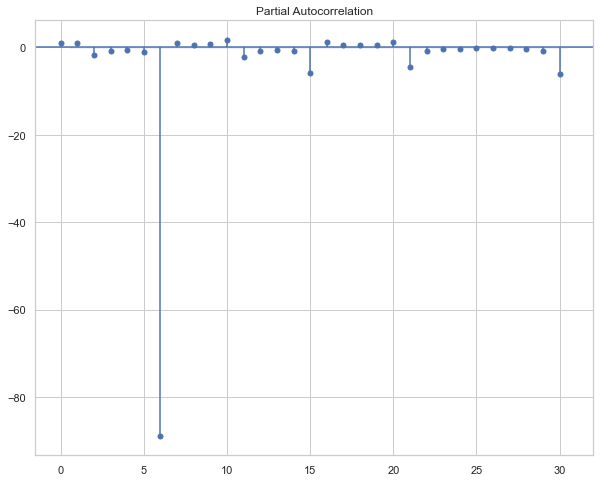

In [31]:
plot_pacf(np.array(DE_new))

This is time series transformation using differencing to remove/reduce seasonality

In [32]:
C = B.diff()
C

,Close
Date,
2016-08-05,NaN
2016-08-08,0.110000
2016-08-09,0.160000
2016-08-10,0.390000
2016-08-11,-0.370000
...,...
2020-01-27,3.670000
2020-01-28,-1.949999
2020-01-29,0.109998


In [33]:
C_new= C.dropna()

<AxesSubplot:xlabel='Date'>

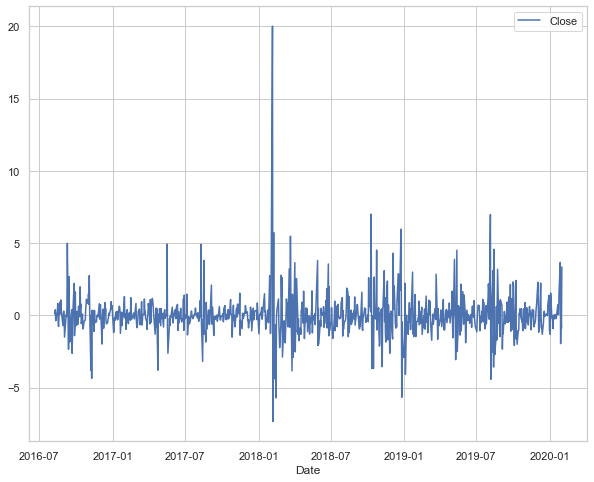

In [34]:
sns.lineplot(data=C_new)

In [35]:
C_new.describe()

,Close
count,877.000000
mean,0.008495
std,1.484336
min,-7.340000
25%,-0.590000
50%,-0.050000
75%,0.440000
max,20.010001


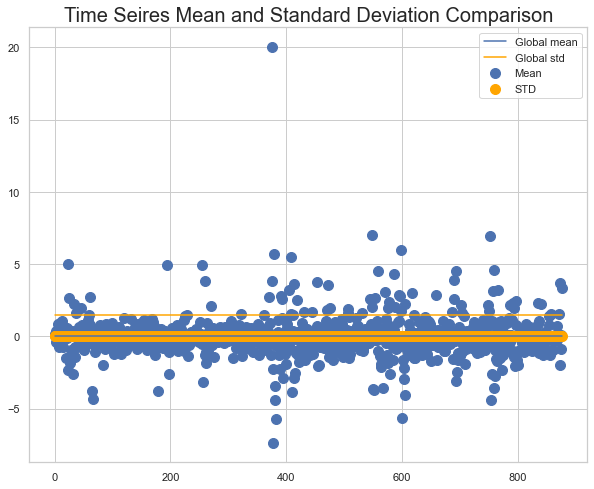

In [36]:
chunks = np.split(C_new, 877)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
# Plot

plt.title('Time Seires Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [C_new.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [C_new.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.figsize=(15, 15)
plt.legend();

In [37]:
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

result  = ts.adfuller(C_new)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.277320
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


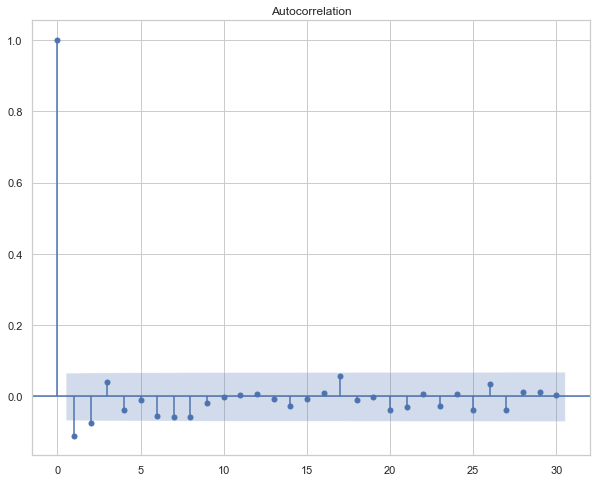

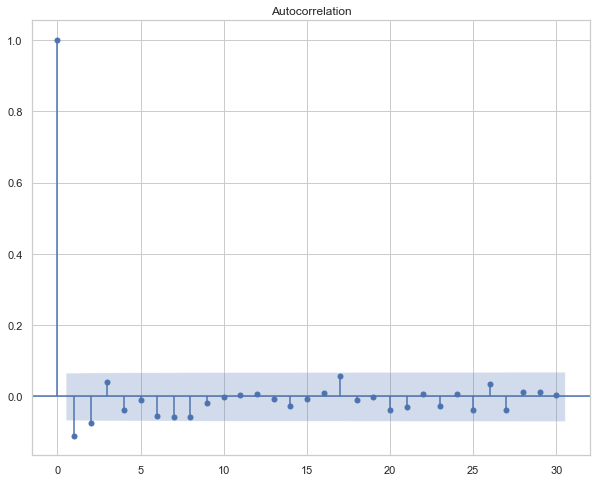

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(C_new))


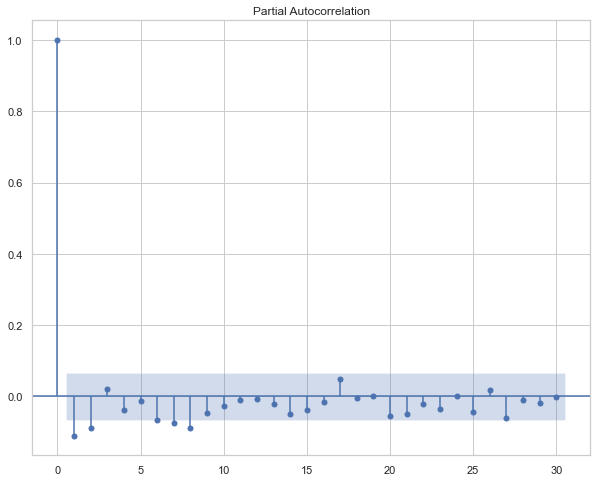

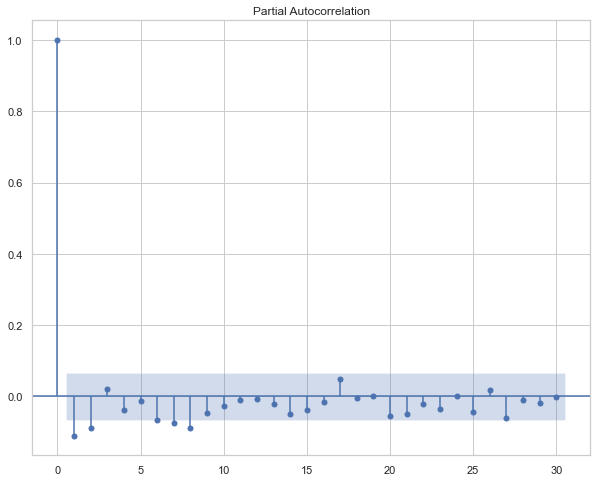

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(np.array(C_new))

To find the order of the AR term (p), we can find required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.


In [54]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(C_new['Close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3160.266, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3184.591, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3175.880, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3173.876, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3182.619, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3171.263, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3171.827, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3157.207, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3171.211, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3170.948, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3155.252, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3171.910, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3

In [55]:
X = C_new.Close
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))


Observations: 877
Training Observations: 613
Testing Observations: 264


In [56]:
print(train)
print(test)

Date
2016-08-08    0.110000
2016-08-09    0.160000
2016-08-10    0.390000
2016-08-11   -0.370000
2016-08-12   -0.130000
                ...   
2019-01-08   -0.930001
2019-01-09   -0.489999
2019-01-10   -0.480000
2019-01-11   -1.309999
2019-01-14    0.879999
Name: Close, Length: 613, dtype: float64
Date
2019-01-15   -0.470000
2019-01-16    0.440001
2019-01-17   -0.980002
2019-01-18   -0.260000
2019-01-22    3.000000
                ...   
2020-01-27    3.670000
2020-01-28   -1.949999
2020-01-29    0.109998
2020-01-30   -0.899999
2020-01-31    3.350000
Name: Close, Length: 264, dtype: float64


<AxesSubplot:xlabel='Date'>

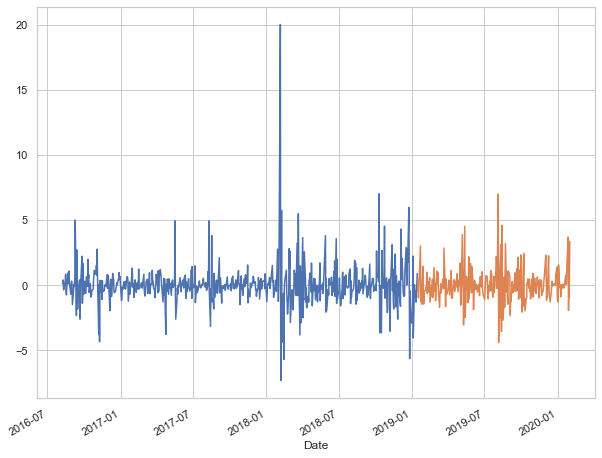

In [57]:
# Visualize train test split
train.plot()
test.plot()

In [58]:
test1 = pd.DataFrame(data=test, columns=['Close'])
test1

,Close
Date,
2019-01-15,-0.470000
2019-01-16,0.440001
2019-01-17,-0.980002
2019-01-18,-0.260000
2019-01-22,3.000000
...,...
2020-01-27,3.670000
2020-01-28,-1.949999
2020-01-29,0.109998


In [44]:
test1.loc["2019-01-15"]

Close   -0.47
Name: 2019-01-15 00:00:00, dtype: float64

In [45]:
train1 = pd.DataFrame(data=train, columns=['Close'])
train1

,Close
Date,
2016-08-08,0.110000
2016-08-09,0.160000
2016-08-10,0.390000
2016-08-11,-0.370000
2016-08-12,-0.130000
...,...
2019-01-08,-0.930001
2019-01-09,-0.489999
2019-01-10,-0.480000


In [59]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train1['Close'],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  613
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1131.799
Date:                Fri, 20 Aug 2021   AIC                           2271.598
Time:                        20:12:14   BIC                           2289.271
Sample:                             0   HQIC                          2278.471
                                - 613                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.030      0.500      0.617      -0.044       0.073
ar.L1          0.8542      0.030     28.782      0.000       0.796       0.912
ma.L1         -0.9560      0.022    -44.053      0.000      -0.999      -0.913
sigma2         2.3494      0.035     68.039      0.000       2.282       2.417
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):             79452.89
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             4.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [194]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train1['Close'],order=(2, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
yhat = model_fit.forecast()
yhat

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


613    0.047642
dtype: float64

In [205]:
forecast = results.get_prediction(start=-25)
mean_forecas = forecast.predicted_mean
mean_forecas

Date
2018-12-07   -0.413484
2018-12-10   -0.068491
2018-12-11   -0.052987
2018-12-12    0.368322
2018-12-13    0.298581
2018-12-14   -0.115255
2018-12-17   -0.089754
2018-12-18   -0.029153
2018-12-19   -0.410485
2018-12-20    0.061122
2018-12-21   -0.142072
2018-12-24   -0.545280
2018-12-26   -0.575115
2018-12-27    0.188363
2018-12-28    0.653926
2018-12-31    0.438845
2019-01-02    0.633910
2019-01-03    0.297549
2019-01-04    0.025825
2019-01-07    0.544757
2019-01-08    0.305749
2019-01-09    0.307762
2019-01-10    0.226112
2019-01-11    0.081314
2019-01-14    0.052514
Name: predicted_mean, dtype: float64

In [196]:
start_index 

datetime.datetime(2019, 1, 5, 0, 0)